In [92]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import scikitplot
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import manhattan_distances

# Classification
1) Learning of different decision trees with different hyper-parameters with the object of maximizing the performances
2) Decision trees interpretation, validation with test and training set
3) Training of different KNN classifiers with different parameters with the object of maximizing the performances.
4) Training of different RandomForests, SVM with different parameters with the object of maximizing the performances
5) Discussion of the best prediction model

In [93]:
df = pd.read_pickle("./dataunderstanding.pkl")
df.head()

,vocal_channel,emotion,emotional_intensity,repetition,sex,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,...,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,1,3737,179379.0,-36.793432,16995,-33.485947,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,1,3904,187387.0,-37.443235,13906,-29.502108,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,happy,1,2,1,4671,224224.0,-32.290737,18723,-30.532463,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,1,3637,174575.0,-49.019839,11617,-36.059555,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,1,4404,211411.0,-31.214503,15137,-31.405996,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [94]:
target = 'sex'

# sistemo il data frame per avere soltanto le colone che mi serve per l'anilisi

In [95]:
#drop columns not useful for analisys  'frame_width', 'channels','sex','emotional_intensity', 'repetition',
dfnaf = df.drop(['sex', 'emotion', 'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral','sad', 'surprised'], axis =1)
# remove columns with std dev less than 0.1
std_dev = dfnaf.std()
columns_to_keep = std_dev[std_dev >= 0.1].index
dfnaf = dfnaf[columns_to_keep]
dfnaf

,vocal_channel,emotional_intensity,repetition,length_ms,frame_count,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,...,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_kur,stft_skew,max,kur,skew
0,0,0,2,3737,179379.0,-36.793432,16995,-33.485947,134.654860,-755.22345,...,3328.055457,0.000000,11403.645197,-1.120769,0.250940,-1.215025,0.403514,0.138947,9.406061,0.273153
1,0,0,1,3904,187387.0,-37.443235,13906,-29.502108,130.485630,-713.98560,...,4040.931570,0.000000,12000.290443,-1.531204,0.219582,-1.384174,0.290905,0.263062,19.564187,0.292157
2,1,1,2,4671,224224.0,-32.290737,18723,-30.532463,126.577110,-726.06036,...,3332.131300,0.000000,12007.751173,-1.130153,0.436699,-1.242947,0.470350,0.166351,4.881241,0.302659
3,0,0,1,3637,174575.0,-49.019839,11617,-36.059555,159.725160,-842.94635,...,4053.663073,0.000000,12048.223893,-1.497765,0.098802,-1.445318,0.274756,0.024078,13.040259,-0.081014
4,1,1,2,4404,211411.0,-31.214503,15137,-31.405996,122.125824,-700.70276,...,3442.724109,0.000000,12025.582707,-1.167544,0.496066,-1.366742,0.318926,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,1,1,4605,221021.0,-42.136827,9871,-30.225578,158.845500,-855.92420,...,4114.260257,0.000000,12210.517144,-1.588861,0.184390,-1.075888,-0.310088,0.052399,9.551363,0.759247
2448,0,0,1,4171,200200.0,-43.342901,8963,-31.160332,157.499700,-825.37410,...,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,-1.026071,-0.408018,0.084045,22.517991,1.073633
2449,1,1,2,5239,251451.0,-37.919308,9765,-26.135280,138.133210,-768.36536,...,4231.511986,0.000000,12207.179884,-1.337419,0.619346,-1.473789,0.130310,0.097260,4.964319,-0.005821
2450,0,0,1,3737,179379.0,-45.751265,9716,-28.242815,159.943400,-868.09576,...,3596.031841,760.822547,11981.912464,-1.465594,0.206481,-1.277117,-0.242668,0.052002,13.855588,-0.110966


In [96]:
X = dfnaf.values
y = df[target].values

In [97]:
knn = KNeighborsClassifier(n_neighbors=3)

## Normalize df

In [98]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Divide data in training, validation and test

In [99]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.3, stratify=y_train_val, random_state=0)

In [101]:
len(X_train), len(X_val), len(X_test)

(1201, 515, 736)

### fit KNN con il train data set e pred con Validation set

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

In [103]:
accuracy_score(y_val, y_pred), accuracy_score(y_train, y_pred_train)

(0.9242718446601942, 0.9367194004995837)

### Vario K points neighbors

In [104]:
acc_val_list = list()
acc_train_list = list()
for k in np.arange(1, 20+1, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    y_pred_train = knn.predict(X_train)
    acc_val_list.append(accuracy_score(y_val, y_pred))
    acc_train_list.append(accuracy_score(y_train, y_pred_train))

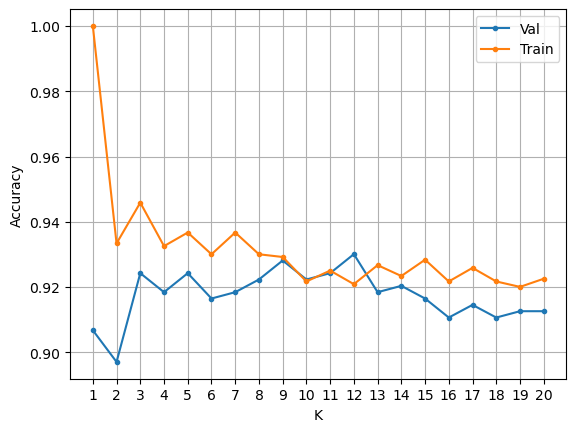

In [105]:
plt.plot(np.arange(1, 20+1, 1), acc_val_list, label='Val', marker='.')
plt.plot(np.arange(1, 20+1, 1), acc_train_list, label='Train', marker='.')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

### Faccio Repeated Hold Out con K

In [106]:
nbr_holdout = 10
acc_val_list_all = list()
acc_train_list_all = list()
for i in range(nbr_holdout):

    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      test_size=0.3,
                                                      stratify=y_train_val,
                                                      random_state=i)

    acc_val_list = list()
    acc_train_list = list()
    for k in np.arange(1, 20+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train)
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train, y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [107]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

In [108]:
acc_val_list_all.shape

(10, 20)

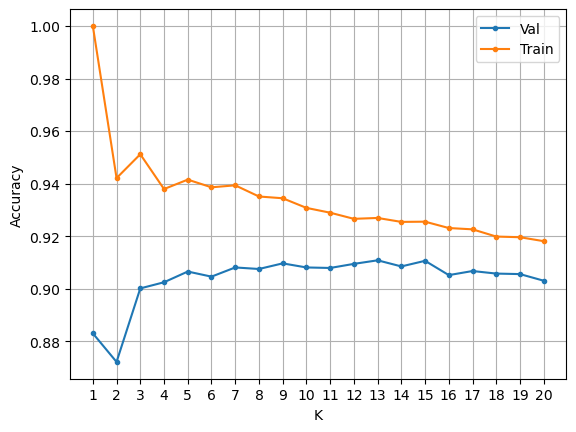

In [109]:
plt.plot(np.arange(1, 20+1, 1), np.mean(acc_val_list_all, axis=0), label='Val', marker='.')
plt.plot(np.arange(1, 20+1, 1), np.mean(acc_train_list_all, axis=0), label='Train', marker='.')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

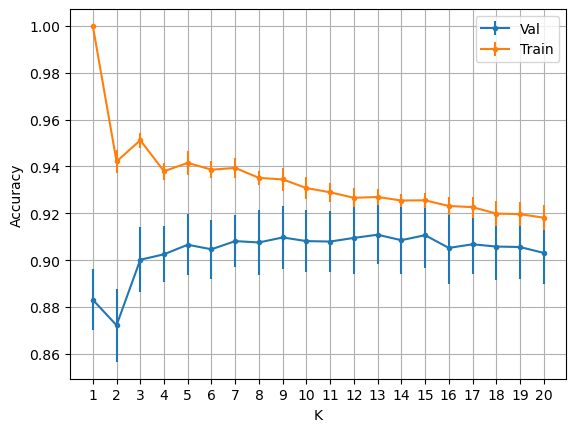

In [110]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_val_list_all, axis=0),
             yerr=np.std(acc_val_list_all, axis=0),
             label='Val', marker='.')

plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_train_list_all, axis=0),
             yerr=np.std(acc_train_list_all, axis=0),
             label='Train', marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

In [111]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
#Scelgo 2 neighbors and i have a 0.41 accuracy
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X_train_val, y_train_val, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.01


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.01


## Faccio la cross validation con K variabile

In [114]:
acc_list_mean = list()
acc_list_std = list()
for k in np.arange(1, 20+1, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_val, y_train_val, cv=10)
    acc_list_mean.append(np.mean(scores))
    acc_list_std.append(np.std(scores))

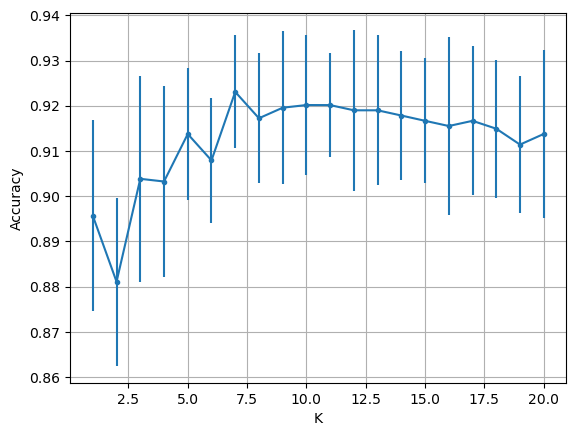

In [151]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=acc_list_mean,
             yerr=acc_list_std,
             marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

### Facciamo un ciclo di repetizione di cross validation per ogni kapa scelto, con l'obietivo di ridurre errori

In [116]:
nbr_repetitions = 5
acc_list_all = list()
for i in range(nbr_repetitions):
    acc_list = list()
    for k in np.arange(1, 20+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train_val, y_train_val, cv=10, #k-fold
                                 scoring='accuracy')
        acc_list.append(scores)

    acc_list_all.append(acc_list)

In [117]:
acc_list_all = np.array(acc_list_all)

In [118]:
np.mean(acc_list_all.reshape(50, 20), axis=0)

array([0.91569767, 0.9122093 , 0.9244186 , 0.89651163, 0.91686047,
       0.92383721, 0.9374269 , 0.91403509, 0.90994152, 0.88888889,
       0.9122093 , 0.91453488, 0.91627907, 0.89127907, 0.91976744,
       0.91337209, 0.94152047, 0.90818713, 0.90467836, 0.88888889])

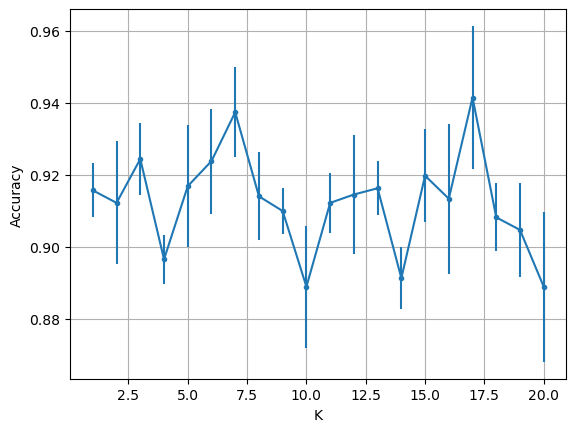

In [152]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_list_all.reshape(50, 20), axis=0),
             yerr=np.std(acc_list_all.reshape(50, 20), axis=0),
             marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [120]:
# scelgo 5 K

In [153]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_val, y_train_val)

y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test)) # sul test set

y_pred_trainval = knn.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # sul training set

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       365
           1       0.93      0.90      0.92       371

    accuracy                           0.92       736
   macro avg       0.92      0.92      0.92       736
weighted avg       0.92      0.92      0.92       736

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       864
           1       0.94      0.93      0.94       852

    accuracy                           0.94      1716
   macro avg       0.94      0.94      0.94      1716
weighted avg       0.94      0.94      0.94      1716



### Simulazione KNN per % di data utilizata per il fit

In [154]:
nbr_repetitions = 7
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.0, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [155]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

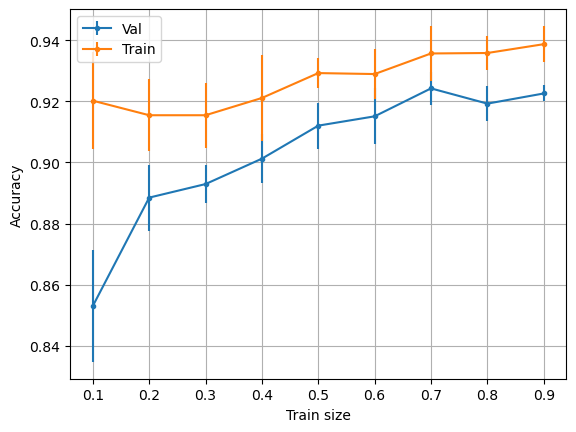

In [156]:
plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.0, 0.1))
plt.grid()
plt.legend()
plt.show()

### Riprovo con manhattan invece de euclidean

In [157]:
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.0, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [158]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

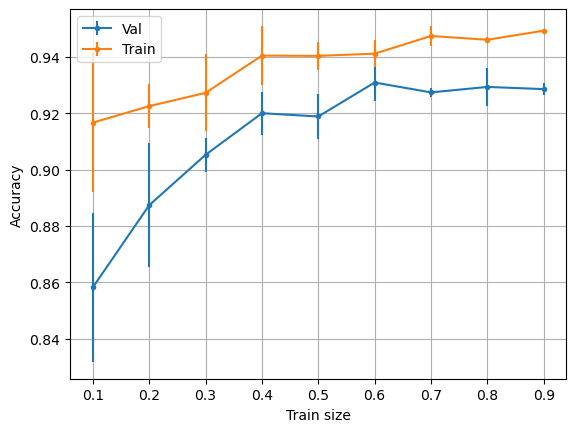

In [159]:
plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.0, 0.1))
plt.grid()
plt.legend()
plt.show()

### Riprovo con Cosine

In [160]:
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.0, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [161]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

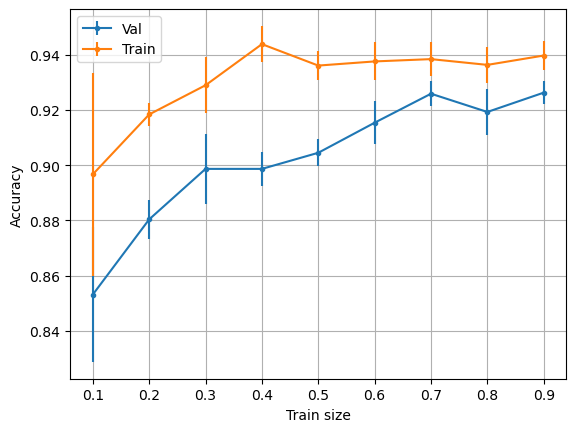

In [162]:
plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.0, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.0, 0.1))
plt.grid()
plt.legend()
plt.show()

### Migliori Hiperparametri
### p = 0.7 the accuracy is lower but the variance also, metric = manhattan, neighbors = 7

In [183]:
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()

for i in range(nbr_repetitions):
    acc_val_list = list()
    acc_train_list = list()
    index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * 0.7), replace=False)
    knn_final = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
    knn_final.fit(X_train[index], y_train[index])
    y_pred = knn_final.predict(X_val)
    y_pred_train = knn_final.predict(X_train[index])
    acc_val_list.append(accuracy_score(y_val, y_pred))
    acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

acc_val_list_all.append(acc_val_list)
acc_train_list_all.append(acc_train_list)

In [184]:
mean_acc_val = np.mean(acc_val_list_all)
std_acc_val = np.std(acc_val_list_all)
mean_acc_train = np.mean(acc_train_list_all)
std_acc_train = np.std(acc_train_list_all)

In [185]:
print(f"Media accuracy validazione: {mean_acc_val:.2f} ± {std_acc_val:.2f}")
print(f"Media accuracy train: {mean_acc_train:.2f} ± {std_acc_train:.2f}")

Media accuracy validazione: 0.94 ± 0.00
Media accuracy train: 0.93 ± 0.00


In [186]:
y_pred = knn_final.predict(X_test)
print(classification_report(y_pred, y_test)) # sul test set

y_pred_trainval = knn_final.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # sul training set

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       359
           1       0.93      0.89      0.91       377

    accuracy                           0.90       736
   macro avg       0.91      0.91      0.90       736
weighted avg       0.91      0.90      0.90       736

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       857
           1       0.94      0.92      0.93       859

    accuracy                           0.93      1716
   macro avg       0.93      0.93      0.93      1716
weighted avg       0.93      0.93      0.93      1716



In [187]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[332,  43],
       [ 27, 334]], dtype=int64)

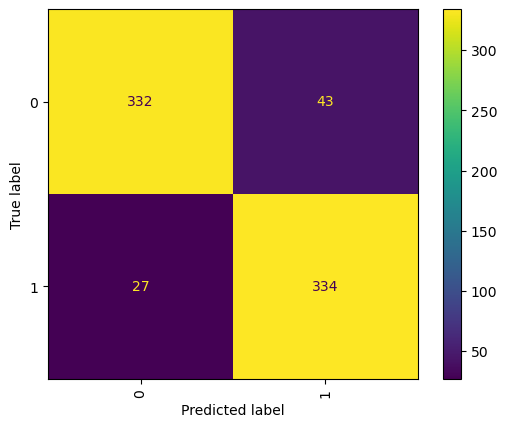

In [188]:
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [169]:
pickle.dump(knn_final, open('knn_final.pickle', 'wb'))

# Decision Tree

### Choosing best parameters

In [170]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=0,
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
accuracy_score(y_val, y_pred)

0.883495145631068

In [171]:
param_dict = {
    'max_depth': np.arange(1, 20+1, 1).tolist() + [None],
    'min_samples_split': np.arange(2, 50+1, 1),
    'min_samples_leaf': np.arange(1, 30+1, 1),
    'ccp_alpha': np.arange(0.0, 0.1, 0.01)
}

In [172]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=0
)
rands = RandomizedSearchCV(clf, param_dict, cv=5, scoring='accuracy', refit=True, n_iter=1000)
rands.fit(X_train_val, y_train_val)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=1000,
                   param_distributions={'ccp_alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20,
                                                      None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
                   scoring='accuracy')

In [173]:
rands.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 18,
 'ccp_alpha': 0.0}

In [174]:
clf = rands.best_estimator_

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8994565217391305

In [175]:
clf_final = DecisionTreeClassifier(
    criterion='gini',
    max_depth=12,
    min_samples_split=18,
    min_samples_leaf=15,
    ccp_alpha=0.0,
    random_state=0
)

In [176]:
pickle.dump(clf_final, open('clf_final.pickle', 'wb'))

In [177]:
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=15, min_samples_split=18,
                       random_state=0)

In [178]:
y_pred = clf_final.predict(X_test)
y_pred_train = clf_final.predict(X_train)

In [179]:
accuracy_score(y_test, y_pred)

0.8722826086956522

In [180]:
accuracy_score(y_train, y_pred_train)

0.9200666111573689

In [181]:
clf_final.classes_

array([0, 1], dtype=int64)

TypeError: can only concatenate str (not "numpy.int64") to str

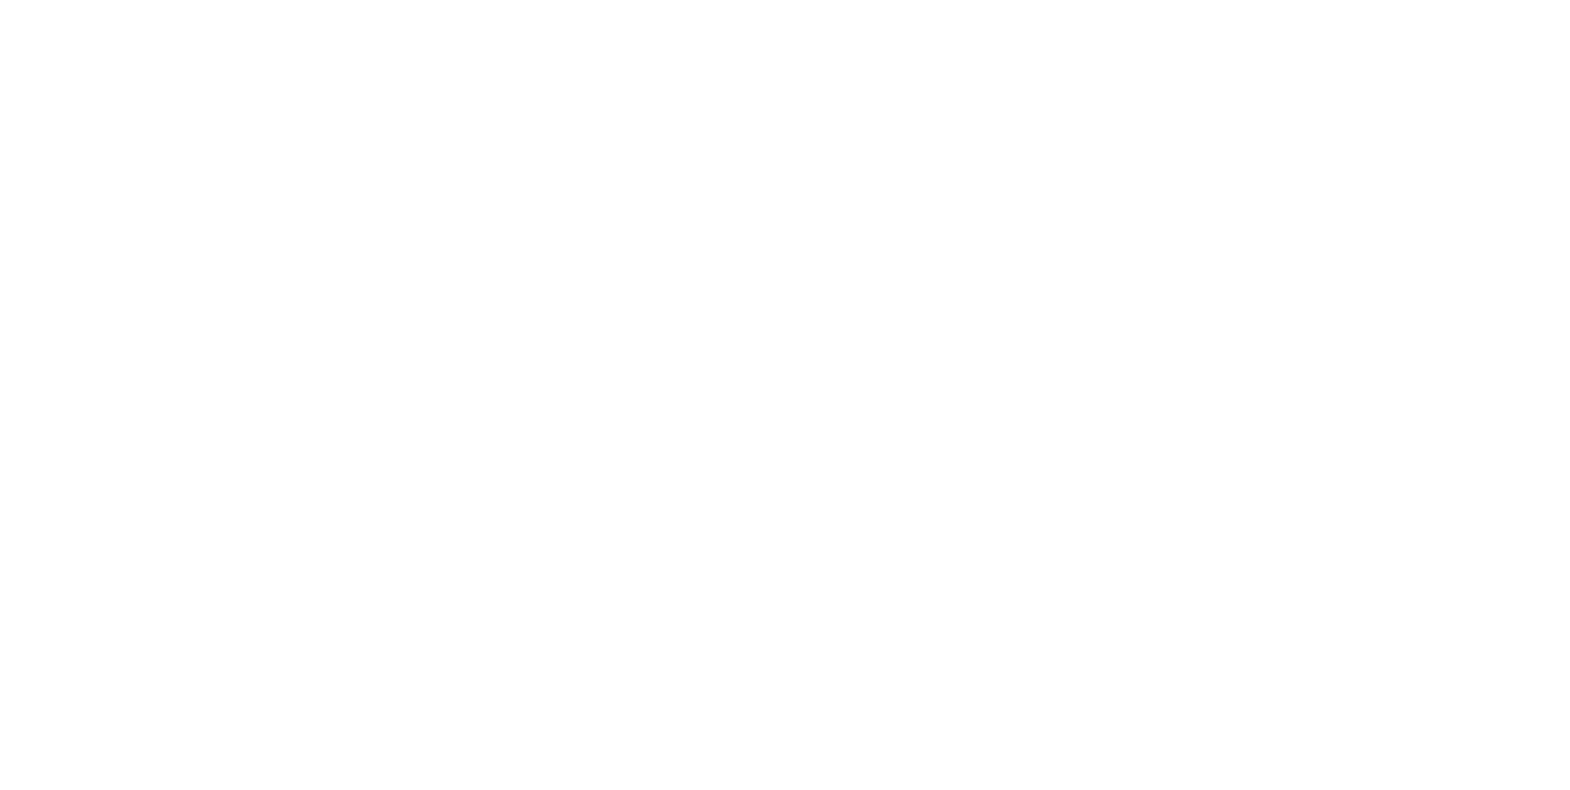

In [182]:
plt.figure(figsize=(20, 10))
plot_tree(clf_final,
          feature_names=dfnaf.columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3
          )
plt.show()

In [ ]:
columns = ['vocal_channel', 'emotional_intensity', 'repetition', 'sex',
       'length_ms', 'frame_count', 'intensity', 'zero_crossings_sum',
       'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max',
       'kur', 'skew']

In [ ]:
#print(export_text(clf, feature_names=columns))

In [ ]:
clf_final.feature_importances_

array([0.025866  , 0.08092429, 0.        , 0.        , 0.06436596,
       0.10578108, 0.        , 0.04625035, 0.02094847, 0.11313651,
       0.17623456, 0.06720587, 0.0007904 , 0.02944844, 0.        ,
       0.00527146, 0.01491731, 0.03060299, 0.        , 0.05903624,
       0.09742864, 0.01690634, 0.04488508])

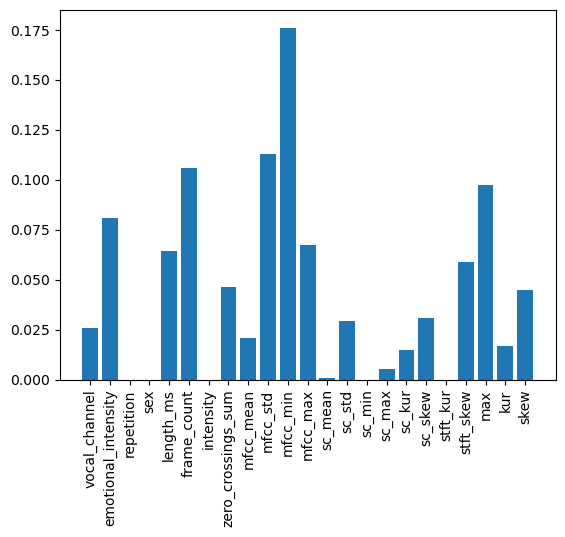

In [ ]:
plt.bar(columns, clf_final.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[57,  1,  3, 27, 19,  3,  1,  2],
       [ 5, 55,  7,  3,  7, 13, 23,  0],
       [ 3,  3, 18,  6,  4,  3, 14,  7],
       [17,  7,  2, 33, 29,  8, 14,  3],
       [12,  5, 11, 21, 31, 14, 12,  7],
       [ 3,  3,  2,  9,  3, 16, 19,  1],
       [ 5, 24,  4, 13,  9,  8, 43,  7],
       [ 6,  0,  6,  9, 13,  3,  5, 15]], dtype=int64)

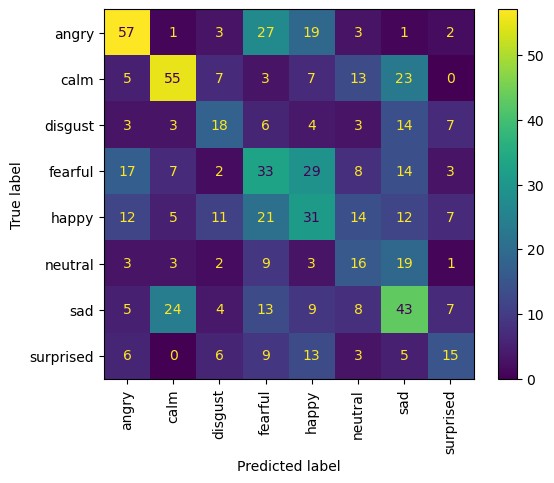

In [ ]:
disp = ConfusionMatrixDisplay(cm, display_labels=clf_final.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#clf_final.predict(X_test)

In [ ]:
y_pred_proba = clf_final.predict_proba(X_test)
y_pred_proba

array([[0.12      , 0.        , 0.08      , ..., 0.        , 0.2       ,
        0.16      ],
       [0.        , 0.19230769, 0.11538462, ..., 0.5       , 0.11538462,
        0.07692308],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25      , 0.        , 0.15      , ..., 0.        , 0.        ,
        0.        ],
       [0.8       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05      ],
       [0.8       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05      ]])

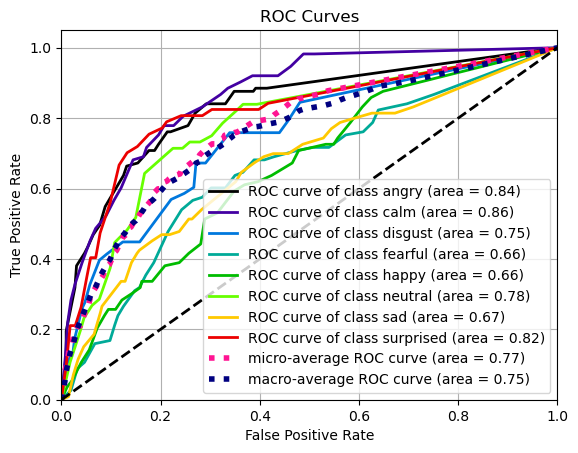

In [ ]:
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.grid()
plt.show()

#### We can see we have an avg area of 0.75, considering 1 is the ideal area we can say this is a very good result

# Random Forest

In [ ]:
clf = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    max_features='sqrt',
    random_state=0
)

rands = RandomizedSearchCV(clf, param_dict, cv=5, scoring='accuracy', refit=True, n_iter=100)
rands.fit(X_train_val, y_train_val)

clf = rands.best_estimator_

clf.fit(X_train_val, y_train_val)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.4470108695652174

In [ ]:
clf

In [ ]:
clf.feature_importances_

In [ ]:
plt.bar(columns, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
len(clf.estimators_)

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(clf.estimators_[5],
          feature_names=columns,
          #class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=2
          )
plt.show()